In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 200)
import seaborn as sns

# Key Result of This Notebook
- choose certain amount of stats for analysis
- valid stats data

In [2]:
df0 = pd.read_csv('/Users/lyndon/Documents/projects/ow/input/phs_2021.csv')

In [3]:
df0.head()

,start_time,esports_match_id,tournament_title,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
4,2021-04-16 19:08:52,37234,OWL 2021,CONTROL,Busan,Doha,Dallas Fuel,Damage - Quick Melee,All Heroes,60.000000


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031558 entries, 0 to 1031557
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   start_time        1031558 non-null  object 
 1   esports_match_id  1031558 non-null  int64  
 2   tournament_title  1031558 non-null  object 
 3   map_type          1031558 non-null  object 
 4   map_name          1031558 non-null  object 
 5   player_name       1031558 non-null  object 
 6   team_name         1031558 non-null  object 
 7   stat_name         996093 non-null   object 
 8   hero_name         1031558 non-null  object 
 9   stat_amount       1031558 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 78.7+ MB


In [5]:
df0['stat_name'].value_counts()

Time Building Ultimate              31851
Time Alive                          31851
Time Played                         31738
Ultimates Earned - Fractional       31612
Time Elapsed per Ultimate Earned    31612
                                    ...  
Recon Kills                             4
Damage - Weapon Tank                    2
Tank Kills                              1
Total Mayhem Kills                      1
Tank Efficiency                         1
Name: stat_name, Length: 358, dtype: int64

In [13]:
stat_num = df0.groupby('stat_name').agg({'hero_name':'nunique'}).reset_index()

In [19]:
stat_num.sort_values(by='hero_name',ascending=False)

,stat_name,hero_name
20,Barrier Damage Done,33
347,Ultimates Used,33
332,Time Elapsed per Ultimate Earned,33
334,Time Holding Ultimate,33
335,Time Played,33
...,...,...
126,Damage Taken - Tank,1
125,Damage Taken - Ball,1
124,Damage Taken - Adaptive Shield,1
122,Damage Reflected,1


In [30]:
stat_num[stat_num['hero_name']>=25].sort_values(by='hero_name')

,stat_name,hero_name
298,Shots Missed,27
297,Shots Hit,27
353,Weapon Accuracy,28
296,Shots Fired,28
259,Quick Melee Hits,29
216,Melee Final Blows,29
258,Quick Melee Accuracy,29
89,Damage - Quick Melee,30
260,Quick Melee Ticks,30
344,Turrets Destroyed,31


In [26]:
stat_num[stat_num['stat_name'].str.contains('Healing')]

,stat_name,hero_name
21,Biotic Field Healing Done,1
24,Biotic Launcher Healing Explosions,1
25,Biotic Launcher Healing Shots,1
27,Biotic Orb Healing Efficiency,1
29,Biotic Orb Maximum Healing,1
37,Coalescence Healing,1
40,Coalesence - Healing per Use,1
177,Healing - Biotic Grenade,1
178,Healing - Biotic Launcher,1
179,Healing - Biotic Orb,1


### choose final stat_names that will be analyzed
- all the general stats(every hero has)
- remove any quick melee
- remoe any accuracy, shot fired/missed, etc

In [205]:
stat_list = stat_num[stat_num['hero_name']>=25]['stat_name'].tolist()

In [206]:
stat_list

['All Damage Done',
 'Assists',
 'Average Time Alive',
 'Barrier Damage Done',
 'Damage - Quick Melee',
 'Damage Taken',
 'Deaths',
 'Eliminations',
 'Environmental Deaths',
 'Final Blows',
 'Healing Received',
 'Hero Damage Done',
 'Melee Final Blows',
 'Multikills',
 'Objective Kills',
 'Objective Time',
 'Quick Melee Accuracy',
 'Quick Melee Hits',
 'Quick Melee Ticks',
 'Shots Fired',
 'Shots Hit',
 'Shots Missed',
 'Solo Kills',
 'Time Alive',
 'Time Building Ultimate',
 'Time Discorded',
 'Time Elapsed per Ultimate Earned',
 'Time Hacked',
 'Time Holding Ultimate',
 'Time Played',
 'Turrets Destroyed',
 'Ultimates Earned - Fractional',
 'Ultimates Used',
 'Weapon Accuracy']

In [207]:
stat_list = [x for x in stat_list if 'Melee' not in x and 'Shots' not in x and 'Accuracy' not in x]

In [208]:
stat_list.append('Healing Done')

In [210]:
stat_list.remove('Turrets Destroyed')

In [211]:
stat_list.remove('Time Elapsed per Ultimate Earned')

In [212]:
stat_list.remove('Ultimates Earned - Fractional')

In [213]:
# final stat_list
stat_list

['All Damage Done',
 'Assists',
 'Average Time Alive',
 'Barrier Damage Done',
 'Damage Taken',
 'Deaths',
 'Eliminations',
 'Environmental Deaths',
 'Final Blows',
 'Healing Received',
 'Hero Damage Done',
 'Multikills',
 'Objective Kills',
 'Objective Time',
 'Solo Kills',
 'Time Alive',
 'Time Building Ultimate',
 'Time Discorded',
 'Time Hacked',
 'Time Holding Ultimate',
 'Time Played',
 'Ultimates Used',
 'Healing Done']

In [214]:
len(stat_list)

23

In [215]:
# df contains only the stats in stat_list
df1 = df0[df0['stat_name'].isin(stat_list)]

In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496227 entries, 0 to 1031553
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        496227 non-null  object 
 1   esports_match_id  496227 non-null  int64  
 2   tournament_title  496227 non-null  object 
 3   map_type          496227 non-null  object 
 4   map_name          496227 non-null  object 
 5   player_name       496227 non-null  object 
 6   team_name         496227 non-null  object 
 7   stat_name         496227 non-null  object 
 8   hero_name         496227 non-null  object 
 9   stat_amount       496227 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 41.6+ MB


In [217]:
df1['tournament_title'].value_counts()

OWL 2021    496227
Name: tournament_title, dtype: int64

In [218]:
# delete tournament_title
df1.drop('tournament_title',axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [221]:
# export
# df1.to_csv('analysis_base.csv')

In [222]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496227 entries, 0 to 1031553
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        496227 non-null  object 
 1   esports_match_id  496227 non-null  int64  
 2   map_type          496227 non-null  object 
 3   map_name          496227 non-null  object 
 4   player_name       496227 non-null  object 
 5   team_name         496227 non-null  object 
 6   stat_name         496227 non-null  object 
 7   hero_name         496227 non-null  object 
 8   stat_amount       496227 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 37.9+ MB


In [223]:
# investigate hero_name (All Hero)
all_hero_df = df1[df1['hero_name']=='All Heroes']

In [224]:
non_all_hero_df = df1[df1['hero_name']!='All Heroes']

In [225]:
non_all_hero_df.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
25,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,Echo,314.000000
26,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,Echo,16.881001
31,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage Taken,Echo,330.778026
32,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Deaths,Echo,1.000000
33,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Healing Received,Echo,130.778090


In [226]:
all_hero_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181494 entries, 0 to 1031470
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        181494 non-null  object 
 1   esports_match_id  181494 non-null  int64  
 2   map_type          181494 non-null  object 
 3   map_name          181494 non-null  object 
 4   player_name       181494 non-null  object 
 5   team_name         181494 non-null  object 
 6   stat_name         181494 non-null  object 
 7   hero_name         181494 non-null  object 
 8   stat_amount       181494 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 13.8+ MB


In [227]:
non_all_hero_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314733 entries, 25 to 1031553
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        314733 non-null  object 
 1   esports_match_id  314733 non-null  int64  
 2   map_type          314733 non-null  object 
 3   map_name          314733 non-null  object 
 4   player_name       314733 non-null  object 
 5   team_name         314733 non-null  object 
 6   stat_name         314733 non-null  object 
 7   hero_name         314733 non-null  object 
 8   stat_amount       314733 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 24.0+ MB


In [228]:
non_all_hero_df.columns.tolist()

['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'stat_name',
 'hero_name',
 'stat_amount']

In [229]:
# check if all_hero means aggreated by mean
res1 = non_all_hero_df.groupby(['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'stat_name']).agg({'stat_amount':'sum'}).reset_index()

In [230]:
res1.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,All Damage Done,11070.553071
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Assists,15.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Barrier Damage Done,3125.426678
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Damage Taken,4393.289180


In [231]:
all_hero_df.drop('hero_name',axis=1,inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [232]:
# comparison
comp1 = res1.merge(all_hero_df, how='inner',on=['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'stat_name'])

In [233]:
comp1.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,stat_amount_x,stat_amount_y
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,All Damage Done,11070.553071,11070.553071
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Assists,15.000000,15.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Average Time Alive,349.130344,116.376781
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Barrier Damage Done,3125.426678,3125.426678
4,2021-04-16 19:08:52,37234,CONTROL,Busan,Crimzo,Houston Outlaws,Damage Taken,4393.289180,4393.289180


In [234]:
comp1[comp1['stat_amount_x']!=comp1['stat_amount_y']]['stat_name'].unique()

array(['Average Time Alive', 'Barrier Damage Done', 'Healing Done',
       'Hero Damage Done', 'Objective Time', 'Time Alive',
       'Time Building Ultimate', 'Time Played', 'Time Holding Ultimate',
       'All Damage Done', 'Damage Taken'], dtype=object)

In [235]:
comp1['per_diff'] = (comp1['stat_amount_x']-comp1['stat_amount_y'])/comp1['stat_amount_x']

In [236]:
comp1[abs(comp1['per_diff'])>0.1]['stat_name'].unique()

array(['Average Time Alive', 'Healing Done'], dtype=object)

<AxesSubplot:xlabel='per_diff', ylabel='stat_name'>

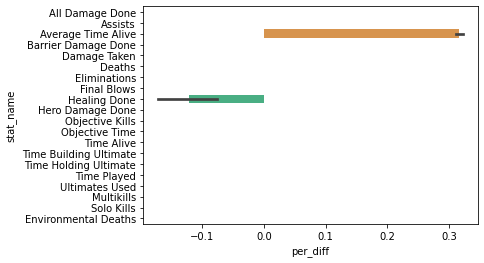

In [237]:
sns.barplot(x='per_diff',y='stat_name',data=comp1)

### conclusion:
- most of the stats are aggregated as sum
- need to investigated into three stats: avg_time_alive(should be agg'd as mean) and Healing Done

### investigate healing done

In [238]:
# should include only healers healing in the analysis
df0[df0['stat_name']=='Healing Done']['hero_name'].unique()

array(['All Heroes', 'Ana', 'Baptiste', 'Moira', 'Brigitte', 'Lúcio',
       'Zenyatta', 'Soldier: 76', 'Mercy'], dtype=object)

In [239]:
df2 = df1[(df1['stat_name']=='Healing Done')&(df1['hero_name']!='Soldier: 76')]

In [240]:
df2.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
11,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Healing Done,All Heroes,1343.570680
281,2021-04-16 19:08:52,37234,CONTROL,Busan,Fielder,Dallas Fuel,Healing Done,All Heroes,16850.441792
312,2021-04-16 19:08:52,37234,CONTROL,Busan,Fielder,Dallas Fuel,Healing Done,Ana,7354.725084
360,2021-04-16 19:08:52,37234,CONTROL,Busan,Fielder,Dallas Fuel,Healing Done,Baptiste,3330.404756
402,2021-04-16 19:08:52,37234,CONTROL,Busan,Fielder,Dallas Fuel,Healing Done,Moira,6165.311952


In [249]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11120 entries, 11 to 1031411
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_time        11120 non-null  object 
 1   esports_match_id  11120 non-null  int64  
 2   map_type          11120 non-null  object 
 3   map_name          11120 non-null  object 
 4   player_name       11120 non-null  object 
 5   team_name         11120 non-null  object 
 6   stat_name         11120 non-null  object 
 7   hero_name         11120 non-null  object 
 8   stat_amount       11120 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 868.8+ KB


In [241]:
def investigate_stat(stat_names, base_df, agg_method):
    # all hero
    test_df = base_df[base_df['stat_name'].isin(stat_names)]
    ah = test_df[test_df['hero_name']=='All Heroes']
    nah = test_df[test_df['hero_name']!='All Heroes']
    res = nah.groupby(['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'stat_name']).agg({'stat_amount':agg_method}).reset_index()
    # compare with the stats amount of 'All Heroes'
    comp = res.merge(ah, how='inner',on=['start_time',
 'esports_match_id',
 'map_type',
 'map_name',
 'player_name',
 'team_name',
 'stat_name'])
    comp['per_diff'] = (comp['stat_amount_x']-comp['stat_amount_y'])/comp['stat_amount_x']
    sns.barplot(x='per_diff',y='stat_name',data=comp)
    return comp

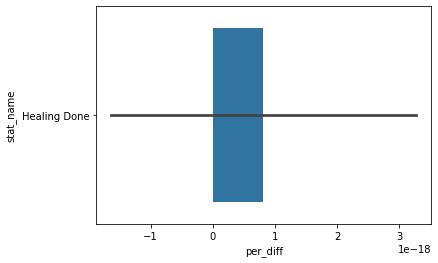

In [252]:
healing_result = investigate_stat(['Healing Done'], df2,'sum')

### conclusion:
Healing Done is also agg as sum, just need to exclude soldier:76

In [256]:
# delete records where soldier:76 has healing done
df3 = df1[~((df1['stat_name']=='Healing Done')&(df1['hero_name']=='Soldier: 76'))]

In [258]:
df3.head()

,start_time,esports_match_id,map_type,map_name,player_name,team_name,stat_name,hero_name,stat_amount
0,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,All Damage Done,All Heroes,13900.680095
1,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Assists,All Heroes,8.000000
2,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Average Time Alive,All Heroes,56.481102
3,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Barrier Damage Done,All Heroes,1495.492155
7,2021-04-16 19:08:52,37234,CONTROL,Busan,Doha,Dallas Fuel,Damage Taken,All Heroes,5083.619094


In [259]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496009 entries, 0 to 1031553
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        496009 non-null  object 
 1   esports_match_id  496009 non-null  int64  
 2   map_type          496009 non-null  object 
 3   map_name          496009 non-null  object 
 4   player_name       496009 non-null  object 
 5   team_name         496009 non-null  object 
 6   stat_name         496009 non-null  object 
 7   hero_name         496009 non-null  object 
 8   stat_amount       496009 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 37.8+ MB


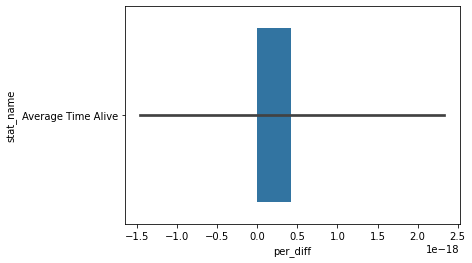

In [243]:
# investigate avg_time_alive, time_elapsed_per_ult_earn
time_alive_n_perult = investigate_stat(['Average Time Alive'],df1,'mean')

## Key Result 1:
Since the way how the stats_amount agg'd has been figured out, the records of 'All Heroes' can be separated as a new summary table. The rest of the records will be used in futher study

In [264]:
all_heroes = df3[df3['hero_name']=='All Heroes']

In [265]:
all_heroes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181494 entries, 0 to 1031470
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        181494 non-null  object 
 1   esports_match_id  181494 non-null  int64  
 2   map_type          181494 non-null  object 
 3   map_name          181494 non-null  object 
 4   player_name       181494 non-null  object 
 5   team_name         181494 non-null  object 
 6   stat_name         181494 non-null  object 
 7   hero_name         181494 non-null  object 
 8   stat_amount       181494 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 13.8+ MB


In [266]:
# export
# all_heroes.to_csv('all_heroes_stats.csv')

In [267]:
df4 = df3[df3['hero_name']!='All Heroes']

In [268]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314515 entries, 25 to 1031553
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   start_time        314515 non-null  object 
 1   esports_match_id  314515 non-null  int64  
 2   map_type          314515 non-null  object 
 3   map_name          314515 non-null  object 
 4   player_name       314515 non-null  object 
 5   team_name         314515 non-null  object 
 6   stat_name         314515 non-null  object 
 7   hero_name         314515 non-null  object 
 8   stat_amount       314515 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 24.0+ MB


In [ ]:
# export 
df4.to_csv('selected.csv')